## Analiza spletne strani Math Stack Exchange
Poglejmo kako najbolje postaviti vprašanje na MSE (Največja možnost za odgovor in dobro oceno)

In [1]:
import pandas as pd

In [2]:
vprasanja = pd.read_csv("vprasanja.csv", index_col="id")
oznake = pd.read_csv("oznake_vprasanj.csv")
vprasanja_z_oznakami_highest = pd.merge(vprasanja[vprasanja["Kategorija"] == "highest-score"], oznake, left_on="id", right_on="id")

## Highest score

Najprej analiziramo najuspešnejša vprašanja (kategorija "highest-score").
Poglejmo si najbolj popularne oznake v kategoriji "highest score".

<Axes: xlabel='Število vprašanj', ylabel='oznaka'>

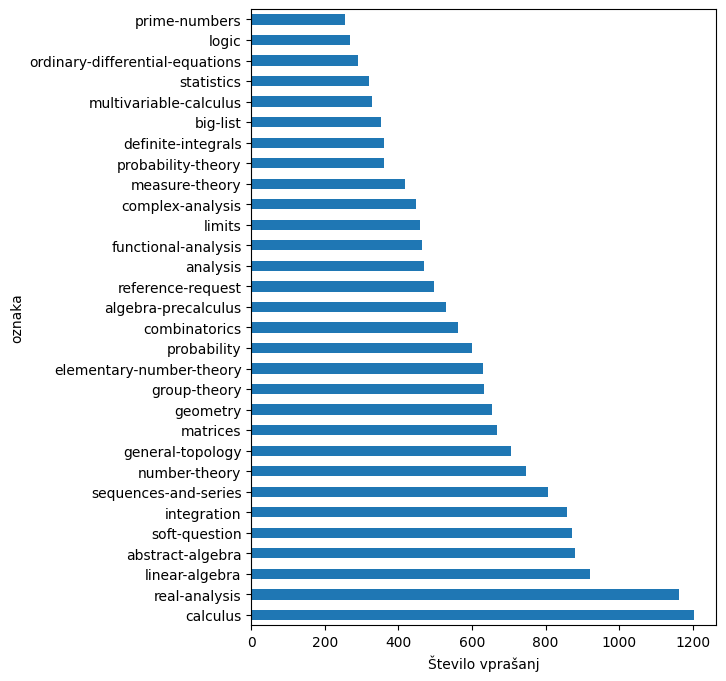

In [3]:
top50_oznake_highest = vprasanja_z_oznakami_highest["oznaka"].value_counts().head(30).index #najbolj popularne oznake
vprasanja_z_oznakami_highest["oznaka"].value_counts().head(30).plot.barh(figsize=(6,8),xlabel="Število vprašanj")

Katere oznake iz top30 imajo najmanj sprejetih odgovorov?

<Axes: xlabel='% neodgovorjenih vprašanj', ylabel='oznaka'>

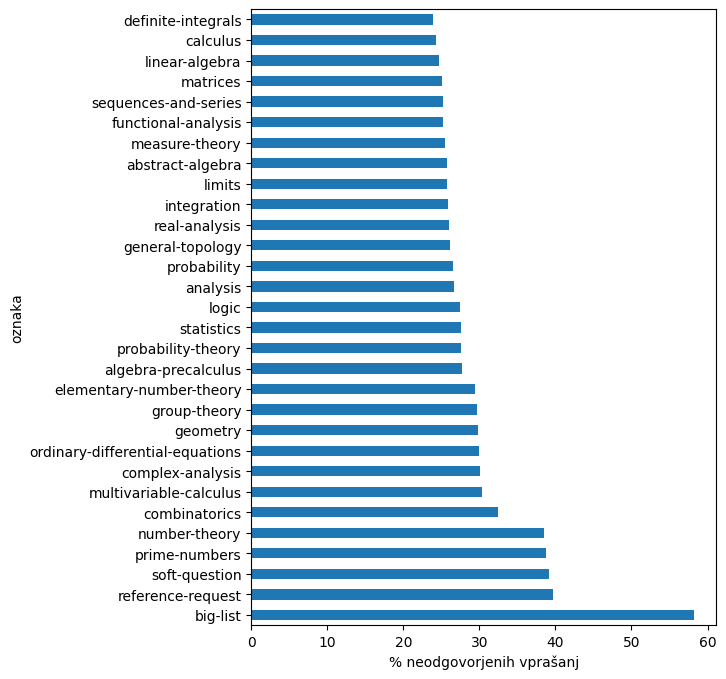

In [4]:
brez_sprej_odg_highest = vprasanja_z_oznakami_highest[(vprasanja_z_oznakami_highest["Ima sprejet odgovor"] == False) & (vprasanja_z_oznakami_highest["Ogledi"] >= 300) & (vprasanja_z_oznakami_highest["oznaka"].isin(top50_oznake_highest))]#vsi brez sprejetega odgovora
st_brez_odg_highest = brez_sprej_odg_highest.groupby("oznaka").size() #za vsako oznako dobim število vprašanj brez sprejetega odgovora
st_vseh_highest = vprasanja_z_oznakami_highest[vprasanja_z_oznakami_highest["oznaka"].isin(top50_oznake_highest)].groupby("oznaka").size()
tezavnost = (st_brez_odg_highest / st_vseh_highest) * 100
tezavnost.sort_values(ascending=False).plot.barh(figsize=(6,8),xlabel="% neodgovorjenih vprašanj")

Poglejmo dolžine naslovov

<Axes: xlabel='Dolzina naslova', ylabel='Število vprašanj'>

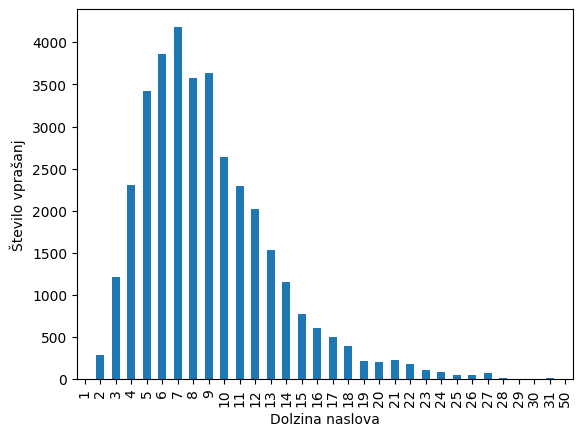

In [5]:
vprasanja_z_oznakami_highest["Dolzina naslova"] = vprasanja_z_oznakami_highest["Naslov"].str.split().str.len()
vprasanja_z_oznakami_highest.groupby("Dolzina naslova").size().plot.bar(ylabel="Število vprašanj")

Vidimo, da ima največ vprašanj naslov sestavljen iz 6-7 besed.

Poglejmo dolžino naslova najuspešnejših vprašanj.

<Axes: xlabel='Dolzina naslova', ylabel='Ogledi'>

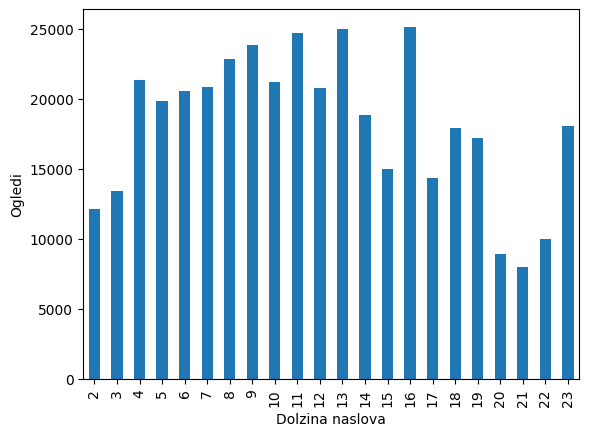

In [6]:
vprasanja_z_oznakami_highest["Dolzina naslova"] = vprasanja_z_oznakami_highest["Naslov"].str.split().str.len()
vprasanja_filter_highest = vprasanja_z_oznakami_highest.groupby("Dolzina naslova").filter(lambda x: len(x) > 100)#Izločimo tiste ki imajo manj kot 100 predstavnikov
vprasanja_filter_highest.groupby("Dolzina naslova")["Ogledi"].mean().plot.bar(ylabel="Ogledi")

<Axes: xlabel='Dolzina naslova', ylabel='Število odgovorov'>

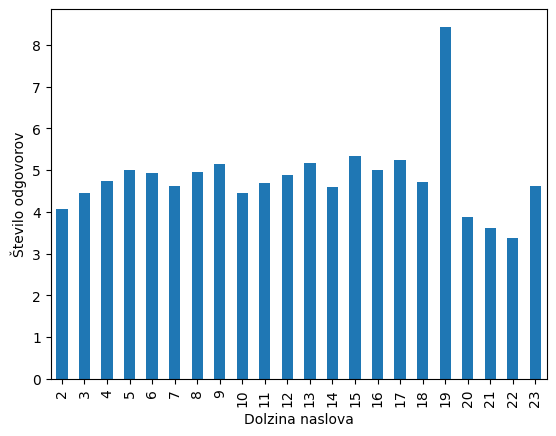

In [7]:
vprasanja_filter_highest.groupby("Dolzina naslova")["Število odgovorov"].mean().plot.bar(ylabel="Število odgovorov")

<Axes: xlabel='Dolzina naslova', ylabel='Glasovi'>

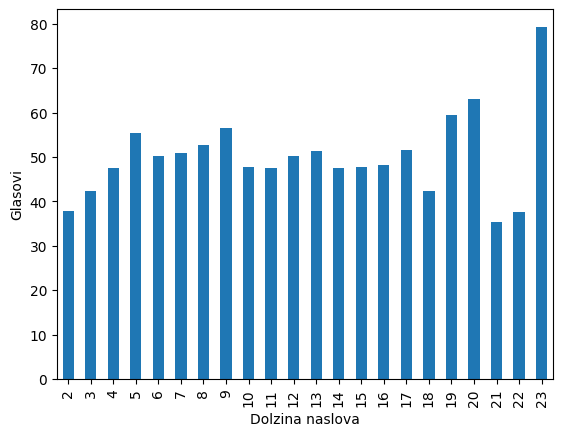

In [8]:
vprasanja_filter_highest.groupby("Dolzina naslova")["Glasovi"].mean().plot.bar(ylabel="Glasovi")

<Axes: xlabel='Dolzina naslova', ylabel='% sprejetih odgovorov'>

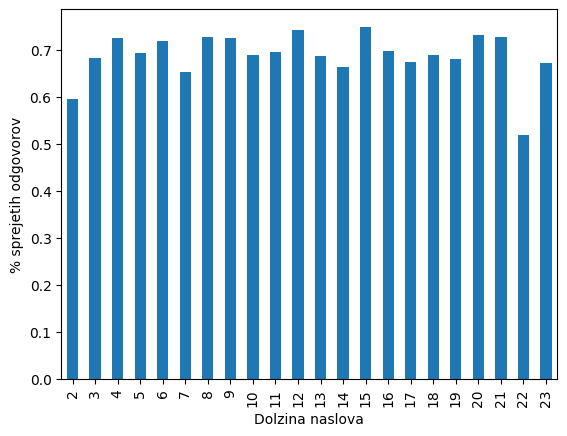

In [9]:
vprasanja_filter_highest.groupby("Dolzina naslova")["Ima sprejet odgovor"].mean().plot.bar(ylabel="% sprejetih odgovorov")

Za vprašanja iz kategorije highets score očitno dolžina naslova ni zelo pomembna, vidimo pa, da imajo  največ ogledov in najboljše ocene vprašanja z naslovom dolžine 7-13 besed.

Poglejmo število oznak

<Axes: xlabel='Število oznak', ylabel='Število vprašanj'>

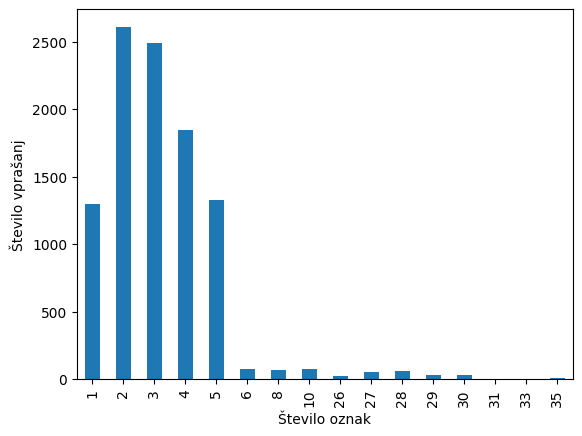

In [10]:
#v vprasanja_z_oznakami imamo toliko vrstic za eno vprasanja kolikor ima to vprasanje oznak
vprasanja_z_oznakami_highest.groupby("id").size().value_counts().sort_index().plot.bar(xlabel= "Število oznak", ylabel="Število vprašanj")

Torej največ vprašanj ima 1-5 oznak.

Poglejmo koliko oznak imajo najuspešnejša vprašanja iz te kategorije.

<Axes: xlabel='število oznak', ylabel='Ogledi'>

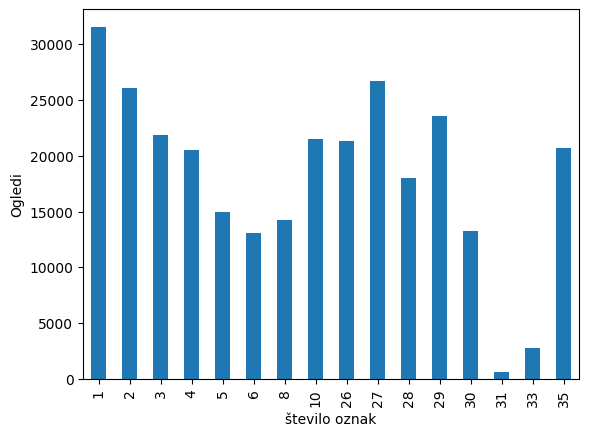

In [11]:
vprasanja_z_oznakami_highest["število oznak"] = vprasanja_z_oznakami_highest.groupby("id")["oznaka"].transform("size")
vprasanja_z_oznakami_highest.groupby("število oznak")["Ogledi"].mean().plot.bar(ylabel="Ogledi")

<Axes: xlabel='število oznak', ylabel='Število odgovorov'>

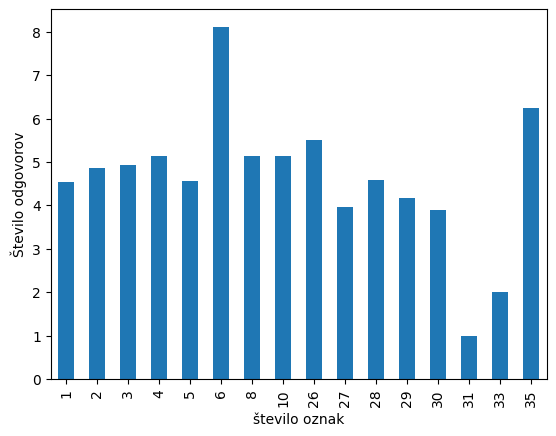

In [12]:
vprasanja_z_oznakami_highest.groupby("število oznak")["Število odgovorov"].mean().plot.bar(ylabel="Število odgovorov")

<Axes: xlabel='število oznak', ylabel='Glasovi'>

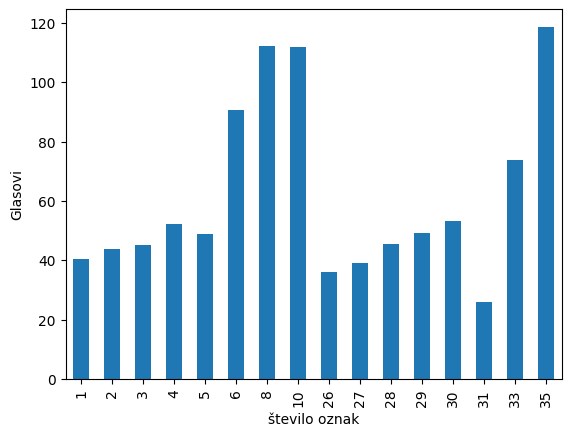

In [13]:
vprasanja_z_oznakami_highest.groupby("število oznak")["Glasovi"].mean().plot.bar(ylabel="Glasovi")

<Axes: xlabel='število oznak', ylabel='% sprejetih odgovorov'>

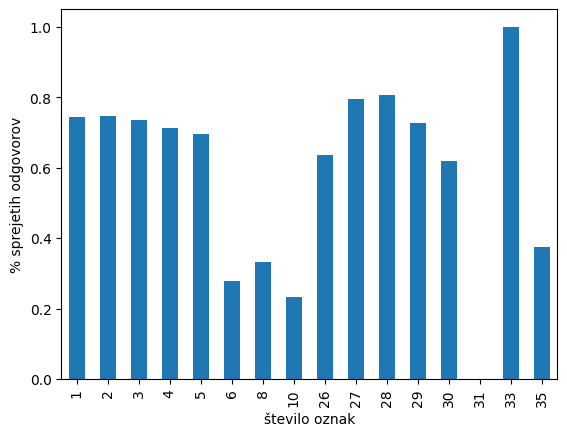

In [14]:
vprasanja_z_oznakami_highest.groupby("število oznak")["Ima sprejet odgovor"].mean().plot.bar(ylabel="% sprejetih odgovorov")

Največ ogledov (najzanimivejša) so torej vprašanja z 1 oznako, najbolje ocenjena pa tista z 10 oznakami. Največ sprejetih odgovorov imajo vprašanja z 12+ oznakami.

## Trending

Poglejmo kako se primerjajo vprašanja iz kategorije "trending".

In [15]:
vprasanja_z_oznakami = pd.merge(vprasanja[vprasanja["Kategorija"] == "trending"], oznake, left_on="id", right_on="id")

<Axes: xlabel='Število vprašanj', ylabel='oznaka'>

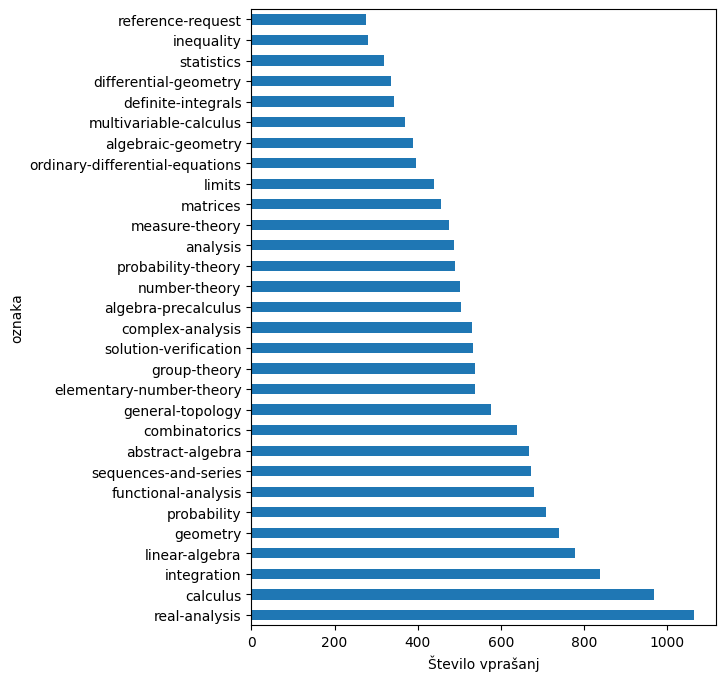

In [16]:
top50_oznake = vprasanja_z_oznakami["oznaka"].value_counts().head(30).index #najbolj popularne oznake
vprasanja_z_oznakami["oznaka"].value_counts().head(30).plot.barh(figsize=(6,8),xlabel="Število vprašanj")

Poglejmo katere oznake izmed 30 najbolj popularnih imajo največ neodgovorjenih vprašanj. Cilj je ugotoviti za katero temo bomo najverjetneje dobili odgovor na vprašanje. Iz podatkov izločimo vprašanja z manj kot 100 ogledi.

<Axes: xlabel='% neodgovorjenih vprašanj', ylabel='oznaka'>

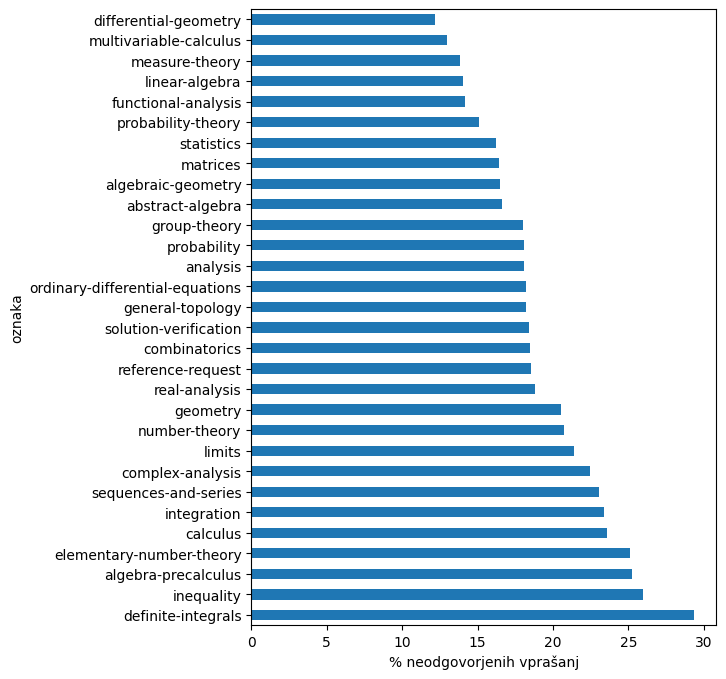

In [17]:
brez_sprej_odg = vprasanja_z_oznakami[(vprasanja_z_oznakami["Ima sprejet odgovor"] == False) & (vprasanja_z_oznakami["Ogledi"] >= 100) & (vprasanja_z_oznakami["oznaka"].isin(top50_oznake))]#vsi brez sprejetega odgovora
st_brez_odg = brez_sprej_odg.groupby("oznaka").size() #za vsako oznako dobim število vprašanj brez sprejetega odgovora
st_vseh = vprasanja_z_oznakami[vprasanja_z_oznakami["oznaka"].isin(top50_oznake)].groupby("oznaka").size()
tezavnost = (st_brez_odg / st_vseh) * 100
tezavnost.sort_values(ascending=False).plot.barh(figsize=(6,8),xlabel="% neodgovorjenih vprašanj")

Poglejmo dolžine naslovov ("trending")

<Axes: xlabel='Dolzina naslova', ylabel='Število vprašanj'>

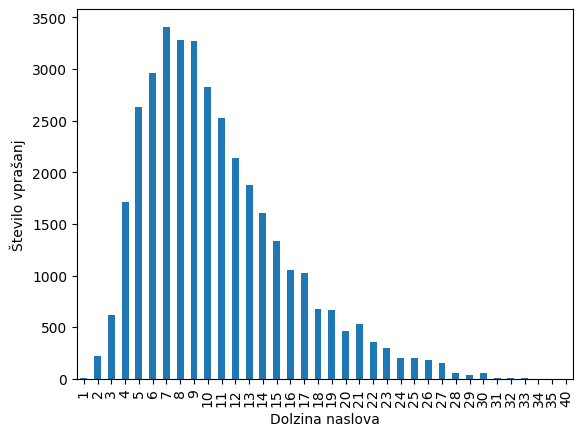

In [18]:
vprasanja_z_oznakami["Dolzina naslova"] = vprasanja_z_oznakami["Naslov"].str.split().str.len()
vprasanja_z_oznakami.groupby("Dolzina naslova").size().plot.bar(ylabel="Število vprašanj")

Vidimo, da je porazdelitev skoraj enaka, kot pri vprašanjih kategorije "highest score".

Naslednji trije grafi pokažejo kako dolžina naslova vpliva na število ogledov, odgovorov in na to, ali ima vprašanje sprejet odgovor.

<Axes: xlabel='Dolzina naslova', ylabel='Ogledi'>

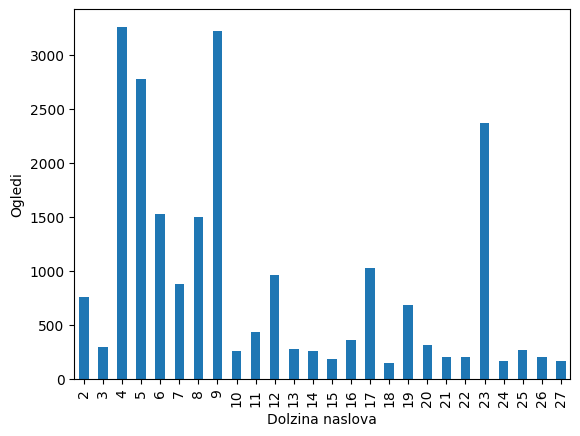

In [19]:
vprasanja_z_oznakami["Dolzina naslova"] = vprasanja_z_oznakami["Naslov"].str.split().str.len()
vprasanja_filter = vprasanja_z_oznakami.groupby("Dolzina naslova").filter(lambda x: len(x) > 100)#Izločimo tiste ki imajo manj kot 100 predstavnikov
vprasanja_filter.groupby("Dolzina naslova")["Ogledi"].mean().plot.bar(ylabel="Ogledi")

<Axes: xlabel='Dolzina naslova', ylabel='Število odgovorov'>

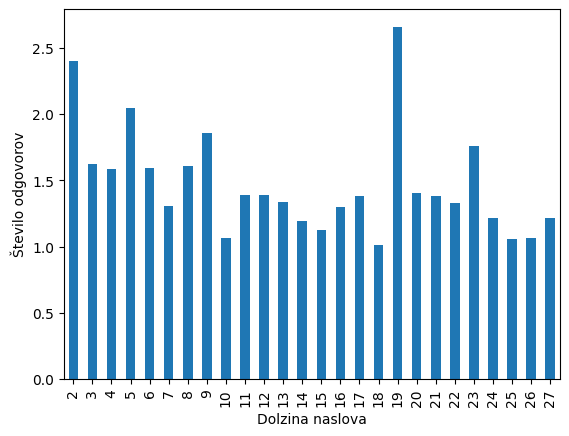

In [20]:
vprasanja_filter.groupby("Dolzina naslova")["Število odgovorov"].mean().plot.bar(ylabel="Število odgovorov")

<Axes: xlabel='Dolzina naslova', ylabel='Glasovi'>

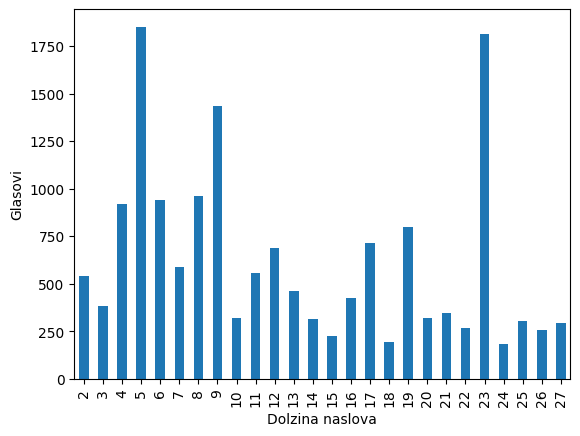

In [21]:
vprasanja_filter.groupby("Dolzina naslova")["Glasovi"].mean().mul(100).plot.bar(ylabel="Glasovi")

<Axes: xlabel='Dolzina naslova', ylabel='% vprašanj s sprejetim odgovorom'>

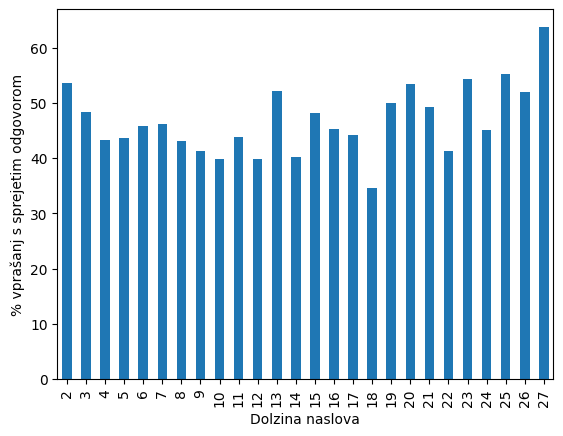

In [22]:
vprasanja_filter.groupby("Dolzina naslova")["Ima sprejet odgovor"].mean().mul(100).plot.bar(ylabel="% vprašanj s sprejetim odgovorom")

Vidimo, da imajo v povprečju največ ogledov vprašanja z naslovom dolžine 9 in 23. Na število odgovorov očitno dolžina naslova ne vpliva, vidimo pa, da daljše kot je vprašanje, večja možnost je za sprejet odgovor, in da so najbolje ocenjena vprašanja z naslovom dolžine 9.

Poglejmo število oznak ("trending")

<Axes: xlabel='Število oznak', ylabel='Število vprašanj'>

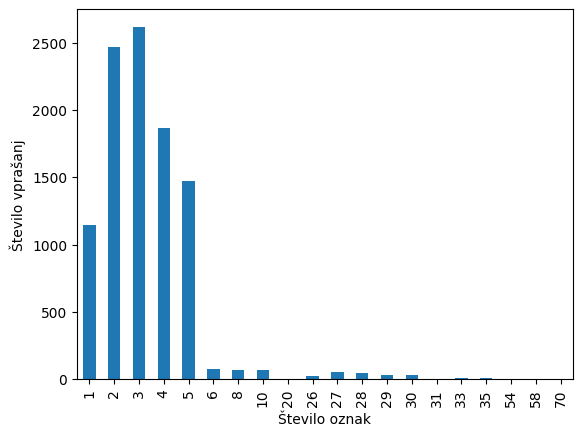

In [23]:
#v vprasanja_z_oznakami imamo toliko vrstic za eno vprasanja kolikor ima to vprasanje oznak
vprasanja_z_oznakami.groupby("id").size().value_counts().sort_index().plot.bar(xlabel= "Število oznak", ylabel="Število vprašanj")

Vidimo, da je porazdelitev podobna kot pri kategoriji "highest score", le da imamo nekaj več vprašanj z 8, 12,16 in 20 oznakami.

Poglejmo si, kako število oznak vpliva na število ogledov, glasov in odgovorov.

<Axes: xlabel='število oznak', ylabel='Ogledi'>

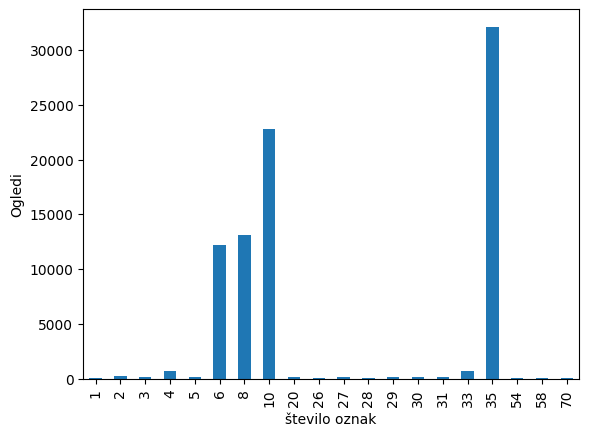

In [24]:
vprasanja_z_oznakami["število oznak"] = vprasanja_z_oznakami.groupby("id")["oznaka"].transform("size")
vprasanja_z_oznakami.groupby("število oznak")["Ogledi"].mean().plot.bar(ylabel="Ogledi")

<Axes: xlabel='število oznak', ylabel='Število odgovorov'>

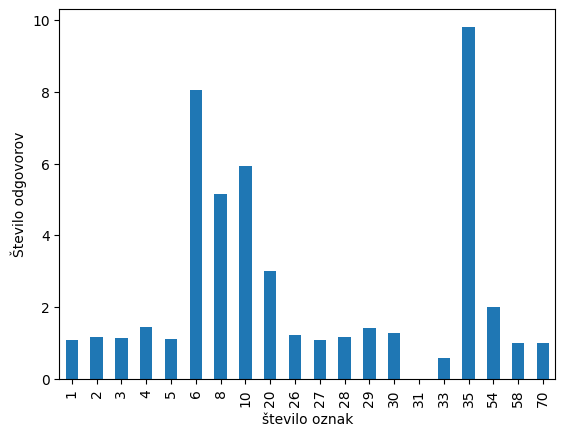

In [25]:
vprasanja_z_oznakami.groupby("število oznak")["Število odgovorov"].mean().plot.bar(ylabel="Število odgovorov")

<Axes: xlabel='število oznak', ylabel='Glasovi'>

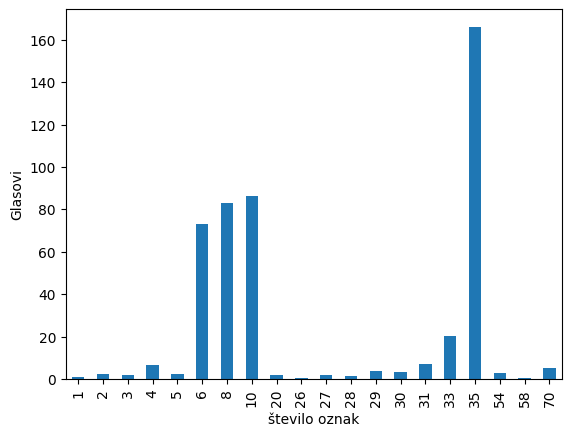

In [26]:
vprasanja_z_oznakami.groupby("število oznak")["Glasovi"].mean().plot.bar(ylabel="Glasovi")

<Axes: xlabel='število oznak', ylabel='% sprejetih odgovorov'>

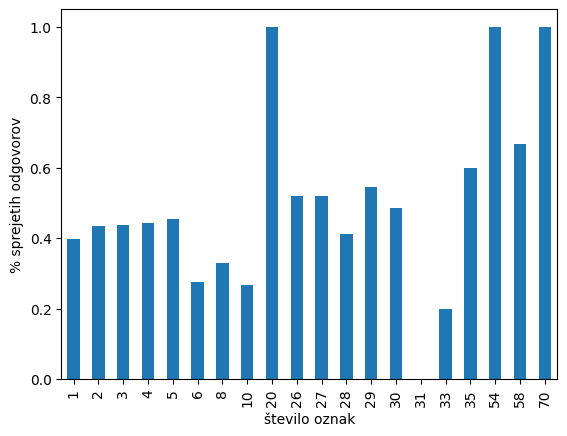

In [27]:
vprasanja_z_oznakami.groupby("število oznak")["Ima sprejet odgovor"].mean().plot.bar(ylabel="% sprejetih odgovorov")

Očitno je najbolje postaviti vprašanja z 6-10 oznakami.

## Unasnwered

Poglejmo kako se primerjajo vprašanja brez odgovora (kategorija unanswered).

Začnimo z najbolj popularnimi oznakami.

In [28]:
vprasanja_z_oznakami_unansw = pd.merge(vprasanja[vprasanja["Kategorija"] == "unanswered"], oznake, left_on="id", right_on="id")

<Axes: xlabel='Število vprašanj', ylabel='oznaka'>

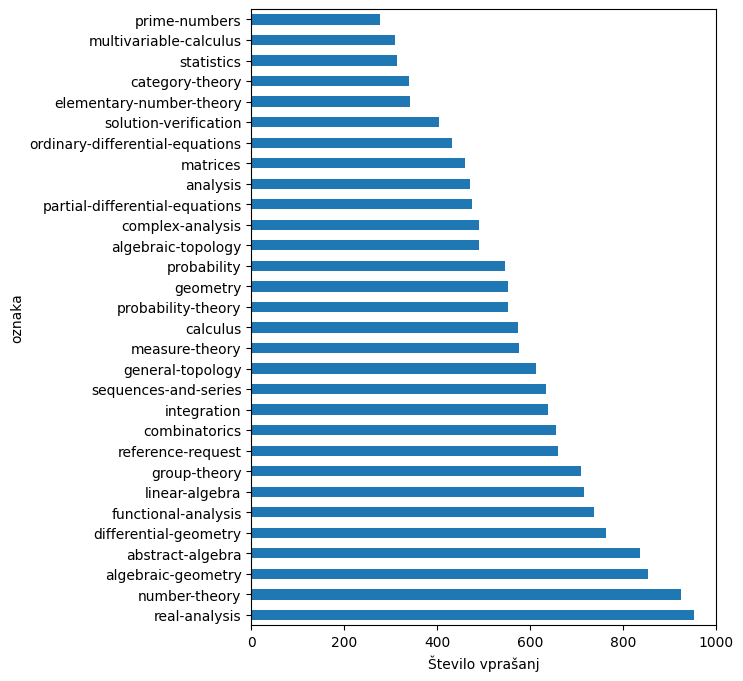

In [29]:
top50_oznake_unansw = vprasanja_z_oznakami_unansw["oznaka"].value_counts().head(30).index #najbolj popularne oznake
vprasanja_z_oznakami_unansw["oznaka"].value_counts().head(30).plot.barh(figsize=(6,8),xlabel="Število vprašanj")

Pogljemo dolžino naslova.

<Axes: xlabel='Dolzina naslova', ylabel='Število vprašanj'>

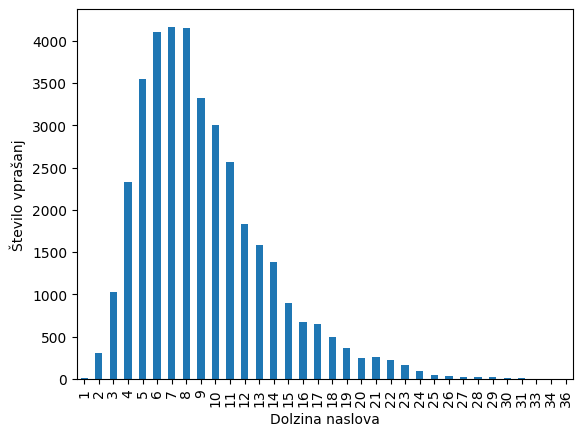

In [30]:
vprasanja_z_oznakami_unansw["Dolzina naslova"] = vprasanja_z_oznakami_unansw["Naslov"].str.split().str.len()
vprasanja_z_oznakami_unansw.groupby("Dolzina naslova").size().plot.bar(ylabel="Število vprašanj")

Tudi v tej kategoriji imamo enako porazdelitev kot pri ostalih treh.

Poglejmo kako je uspešnost povezana z dolžino naslova

<Axes: xlabel='Dolzina naslova', ylabel='Ogledi'>

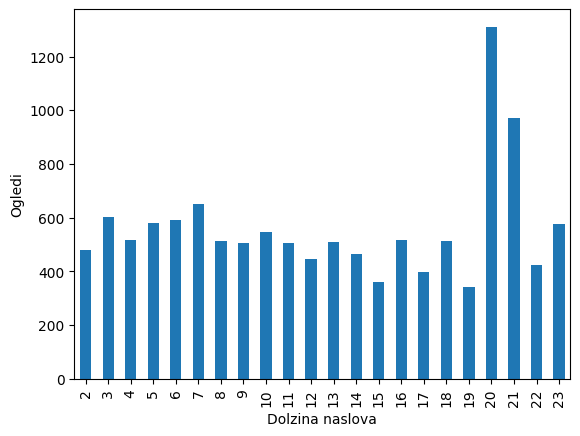

In [31]:
vprasanja_z_oznakami_unansw["Dolzina naslova"] = vprasanja_z_oznakami_unansw["Naslov"].str.split().str.len()
vprasanja_filter_unansw = vprasanja_z_oznakami_unansw.groupby("Dolzina naslova").filter(lambda x: len(x) > 100)#Izločimo tiste ki imajo manj kot 100 predstavnikov
vprasanja_filter_unansw.groupby("Dolzina naslova")["Ogledi"].mean().plot.bar(ylabel="Ogledi")

<Axes: xlabel='Dolzina naslova', ylabel='Glasovi'>

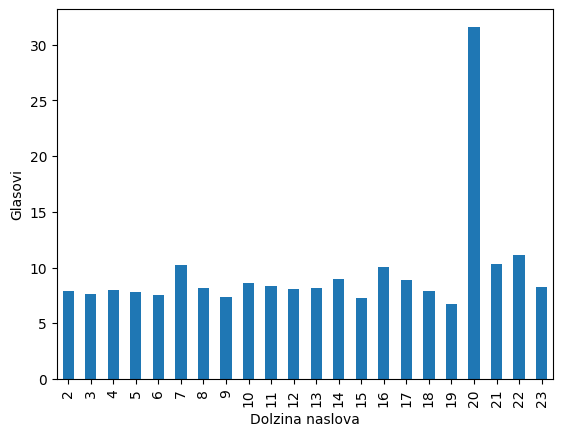

In [32]:
vprasanja_filter_unansw.groupby("Dolzina naslova")["Glasovi"].mean().plot.bar(ylabel="Glasovi")

Vidimo, da to kategorijo predstavljajo predvsem vprašanja z malo ogledi in slabimi ocenami. Dolžina naslova ni relevantna.

Poglejmo si še število oznak.

<Axes: xlabel='Število oznak', ylabel='Število vprašanj'>

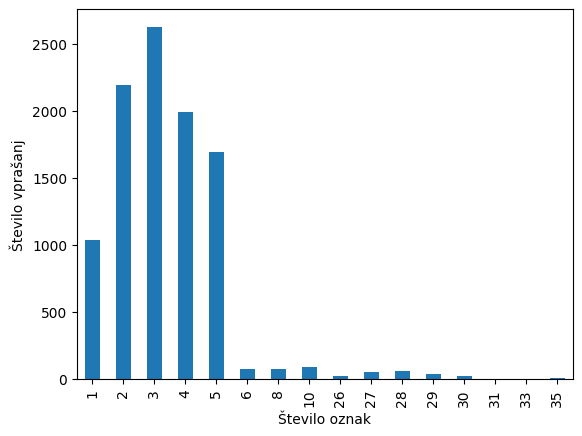

In [33]:
vprasanja_z_oznakami_unansw.groupby("id").size().value_counts().sort_index().plot.bar(xlabel= "Število oznak", ylabel="Število vprašanj")

Enako kot pri ostalih kategorijah ima največ vprašanj po 1-5 oznak.

Poglejmo kako vpliva število oznak na uspešnost vprašanja.

<Axes: xlabel='število oznak', ylabel='Ogledi'>

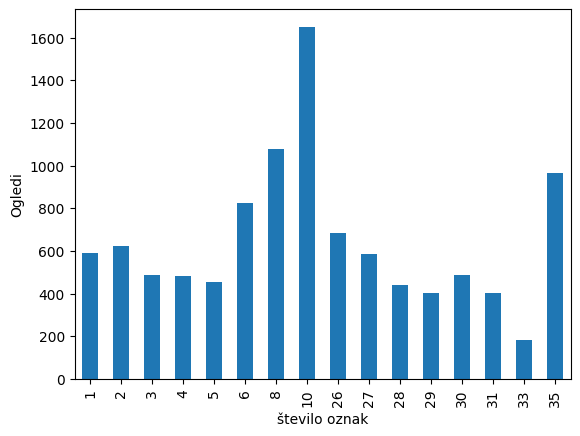

In [34]:
vprasanja_z_oznakami_unansw["število oznak"] = vprasanja_z_oznakami_unansw.groupby("id")["oznaka"].transform("size")
vprasanja_z_oznakami_unansw.groupby("število oznak")["Ogledi"].mean().plot.bar(ylabel="Ogledi")

<Axes: xlabel='število oznak', ylabel='Glasovi'>

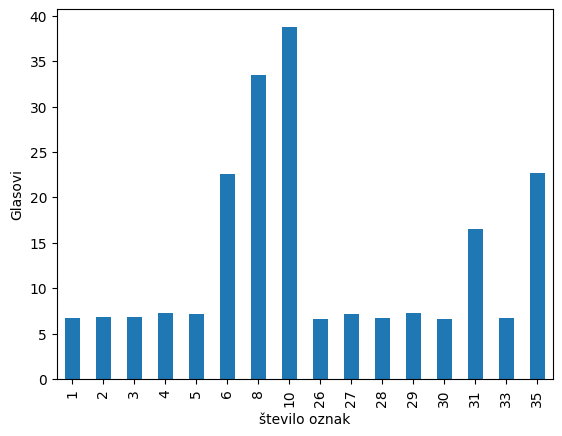

In [35]:
vprasanja_z_oznakami_unansw.groupby("število oznak")["Glasovi"].mean().plot.bar(ylabel="Glasovi")

Torej vprašanja v tej kategoriji nimajo odgovora ne zato, ker so pretežka, ampak zato, ker so slabo ocenjena in imajo malo ogledov.

Za konec si še poglejmo še kako je v splošnem povezan ugled avtorja z uspehom vprašanja.

/var/folders/lj/fhnk8b7x1kl5hhh1nvzbczk00000gn/T/ipykernel_34206/1284196741.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vprasanja_z_reputacijo.groupby(pd.cut(vprasanja_z_reputacijo["reputation"], bins=bins, labels=labels))["Glasovi"].mean().plot(figsize=(8,8), ylabel="Gasovi-povprečje")


<Axes: xlabel='reputation', ylabel='Gasovi-povprečje'>

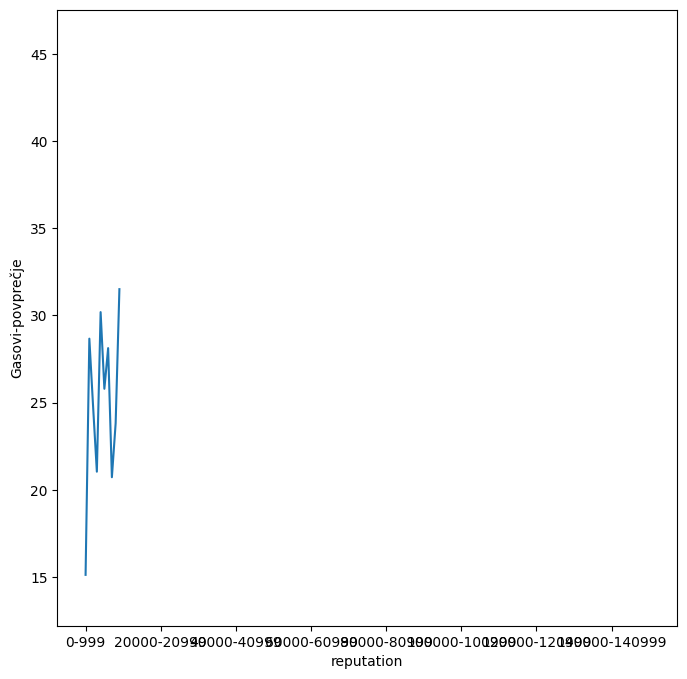

In [36]:
avtorji = pd.read_csv("avtorji.csv")
vprasanja_z_reputacijo = pd.merge(vprasanja, avtorji, left_on="Avtor", right_on="author")
max_rep = vprasanja_z_reputacijo["reputation"].max()
bins  = range(0, int(max_rep) + 1000, 1000)
labels = [f"{i}-{i+999}" for i in bins[:-1]]
vprasanja_z_reputacijo.groupby(pd.cut(vprasanja_z_reputacijo["reputation"], bins=bins, labels=labels))["Glasovi"].mean().plot(figsize=(8,8), ylabel="Gasovi-povprečje")

Vidimo, da načeloma avtorji z boljšim ugledom postavljajo boljša vprašanja